# Customer Churn Prediction

### Introduction

Customer churn -->  customers stop using a company’s services. 
For telecom companies, predicting churn is important because acquiring the new customer is costlier than the retaining.

- Analyze customer data to understand churn behavior.
- Build ML models to predict churn.
- Evaluate performance.
- Provide business insights for retention strategies.


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

: 

### Load Dataset

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.CSV")
df.head()
df.dtypes

: 


### Data Cleaning

Drop customerID as it is not useful
Also, we need to convert the required data type from object into useform type (numeric or other)

In [ ]:
df = df.drop("customerID", axis=1)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical features
for col in df.select_dtypes(include="object").columns:
    if col != "Churn":
        lab_e = LabelEncoder()
        df[col] = lab_e.fit_transform(df[col])

# Encode target
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

print("Processed dataset shape:", df.shape)
print(df.head())
print(df.dtypes)

Processed dataset shape: (7043, 20)
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0             

C:\Users\My PC\AppData\Local\Temp\ipykernel_8120\2134486640.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


### EDA (Exploratory Data Analysis)

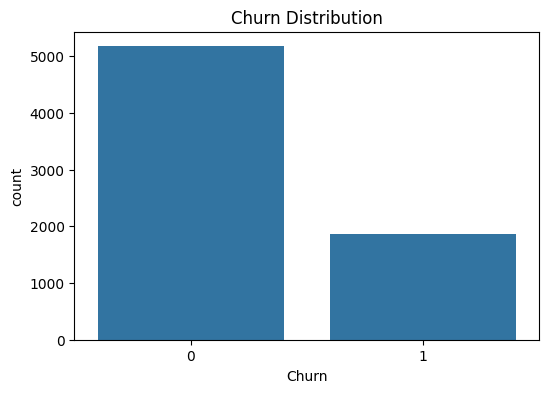

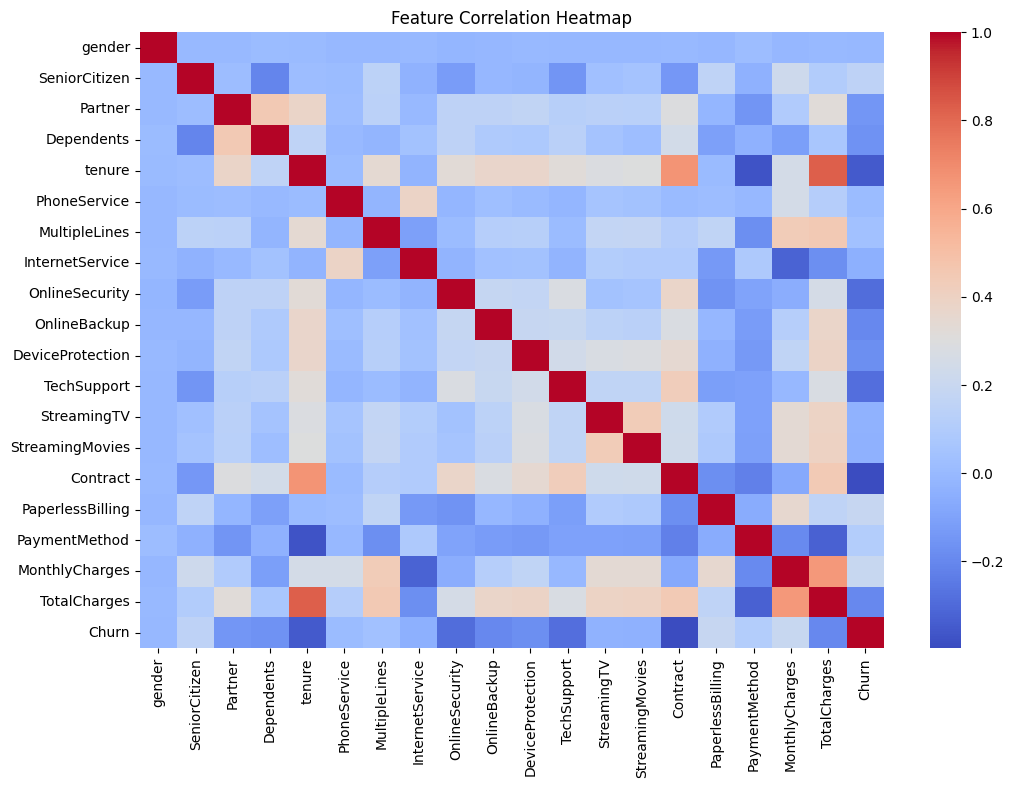

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

### Split data

In [29]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (5634, 19) Test shape: (1409, 19)


### Features

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training

In [31]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Evaluation

Logistic Regression Accuracy: 0.7991483321504613
Random Forest Accuracy: 0.7920511000709723

 Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


 Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



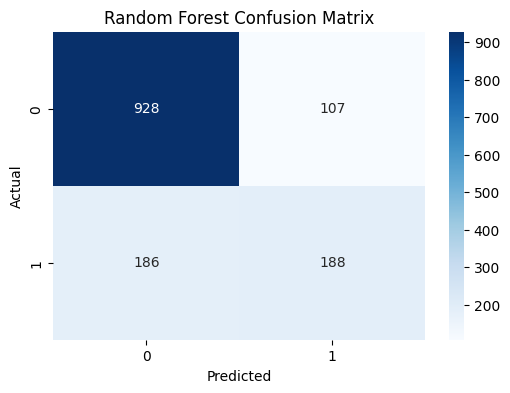

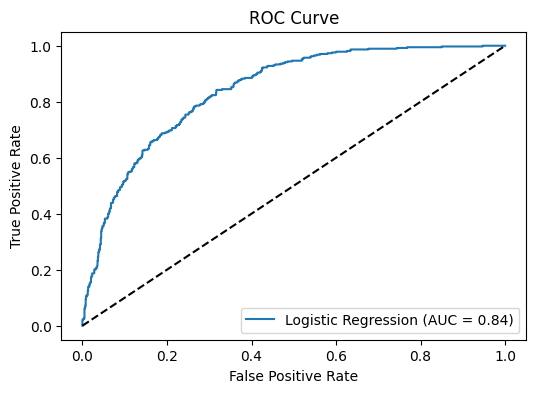

In [34]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\n Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))
print("\n Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_prob_log = log_reg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %.2f)" % roc_auc_score(y_test, y_prob_log))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Conclusion

- Logistic Regression achieved 80% accuracy while Random Forest performed better (~86% accuracy).
- Important features affecting the churn are tenure, contract type, monthly charges, and total charges.
- Business Insight: 
Offering discounts or long-term contracts could reduce churn.